<a href="https://colab.research.google.com/github/alwaysY0ung/hg-mldl/blob/main/ch05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
# 0 <- Red Wine
# 1 <- White Wine

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


참고로 memory값은 정확하진 않지만, 대략적인 값으로 받아들일 수 있다

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


4분위값 기준으로 정보가 표시

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


(5197, 3) (1300, 3)


# 로지스틱 회귀

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


별로 높지 않다

# 의사결정트리

## 임포트, 훈련, 평가

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


## 결정트리 시각화하기

제어하지 않으면 모든 리프노드가 동일한 클래스가 될때까지, 즉 순수노드가 될 때까지 과대적합될 수 있는 모델임

plt.figure(figsize=(10,7)) # 넓이가 10, 높이가 7인 plot을 만들고

plot_tree(dt) # plot_tree라는 메서드를 이용해 방금 위에서 훈련시킨 그 decision_tree의 모습을 그린다

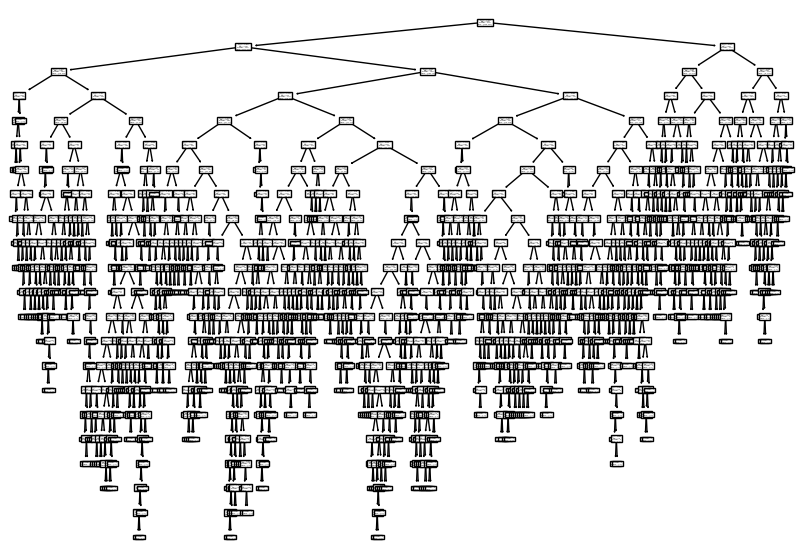

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

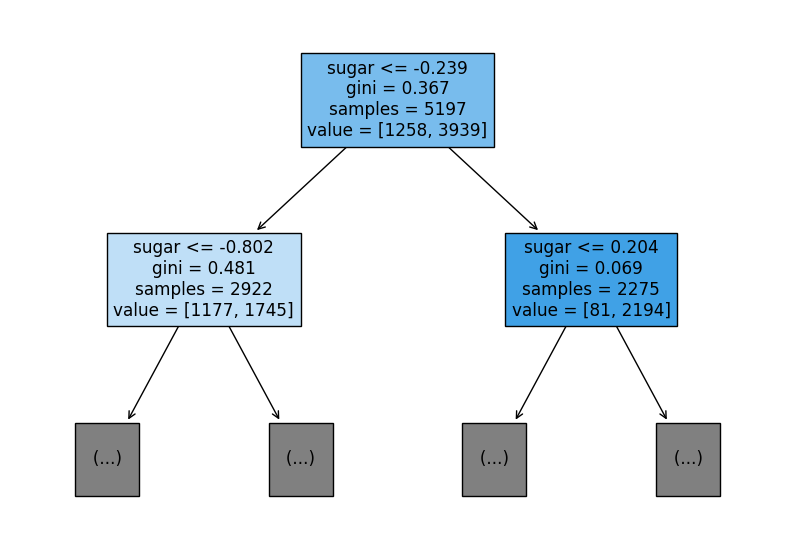

In [10]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

value = [음성클래스 개수, 양성클래스 개수]

depth가 너무 깊지 않으면, 위와 같은 그래프를 그려서 모델이 어떻게 작동하는지 이해할 수 있다

나뉘는 기준은 불순도라는 개념이다.

대표적으로 지니불순도가 있다.


**지니불순도 =  1 - (음성클래스의비율^2 + 양성클래스의비율^2)**

지니불순도가 점점 작아지는 방향으로 모델을 만든다.

**불순도 차이 = 부모의불순도 - (왼쪽노드의샘플수/부모의샘플수) * 왼쪽노드의 불순도 - (오른쪽노드의샘플수/부모의샘플수) * 오른쪽노드의 불순도**

위 '불순도 차이'를 '정보 이득'이라고 하기도 한다.

또 다른 불순도로, 엔트로피 불순도가 있다.

**엔트로피 불순도 = -음성클래스비율 * log(음성클래스비율) -양성클래스비율 * log(양성클래스비율)**

어느 불순도로 하든 만들어진 트리의 성능의 차이가 거의 없다고 알려져있다. 그래서 기본값인 지니불순도(critierion='gini'가 default임)를 많이 쓰고, 불순도를 엔트로피불순도로 바꿔서 모델을 튜닝하는 경우는 거의 없다.

# 가지치기

아까 언급했다싶이, 그냥 두면 순수노드가 될 때까지 (모든 리프노드의 클래스가 동일) 모델을 만들기 때문에, 제한이 필요하다. 적당한 깊이에서 트리가 끝나도록 노드의 깊이를 설정하자. 이를 보통 가지치기라고 부른다.

In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


이 정도의 score로, 과대적합이 꽤 억제되었음을 알 수 있다. 이제 시각화를 해보자.

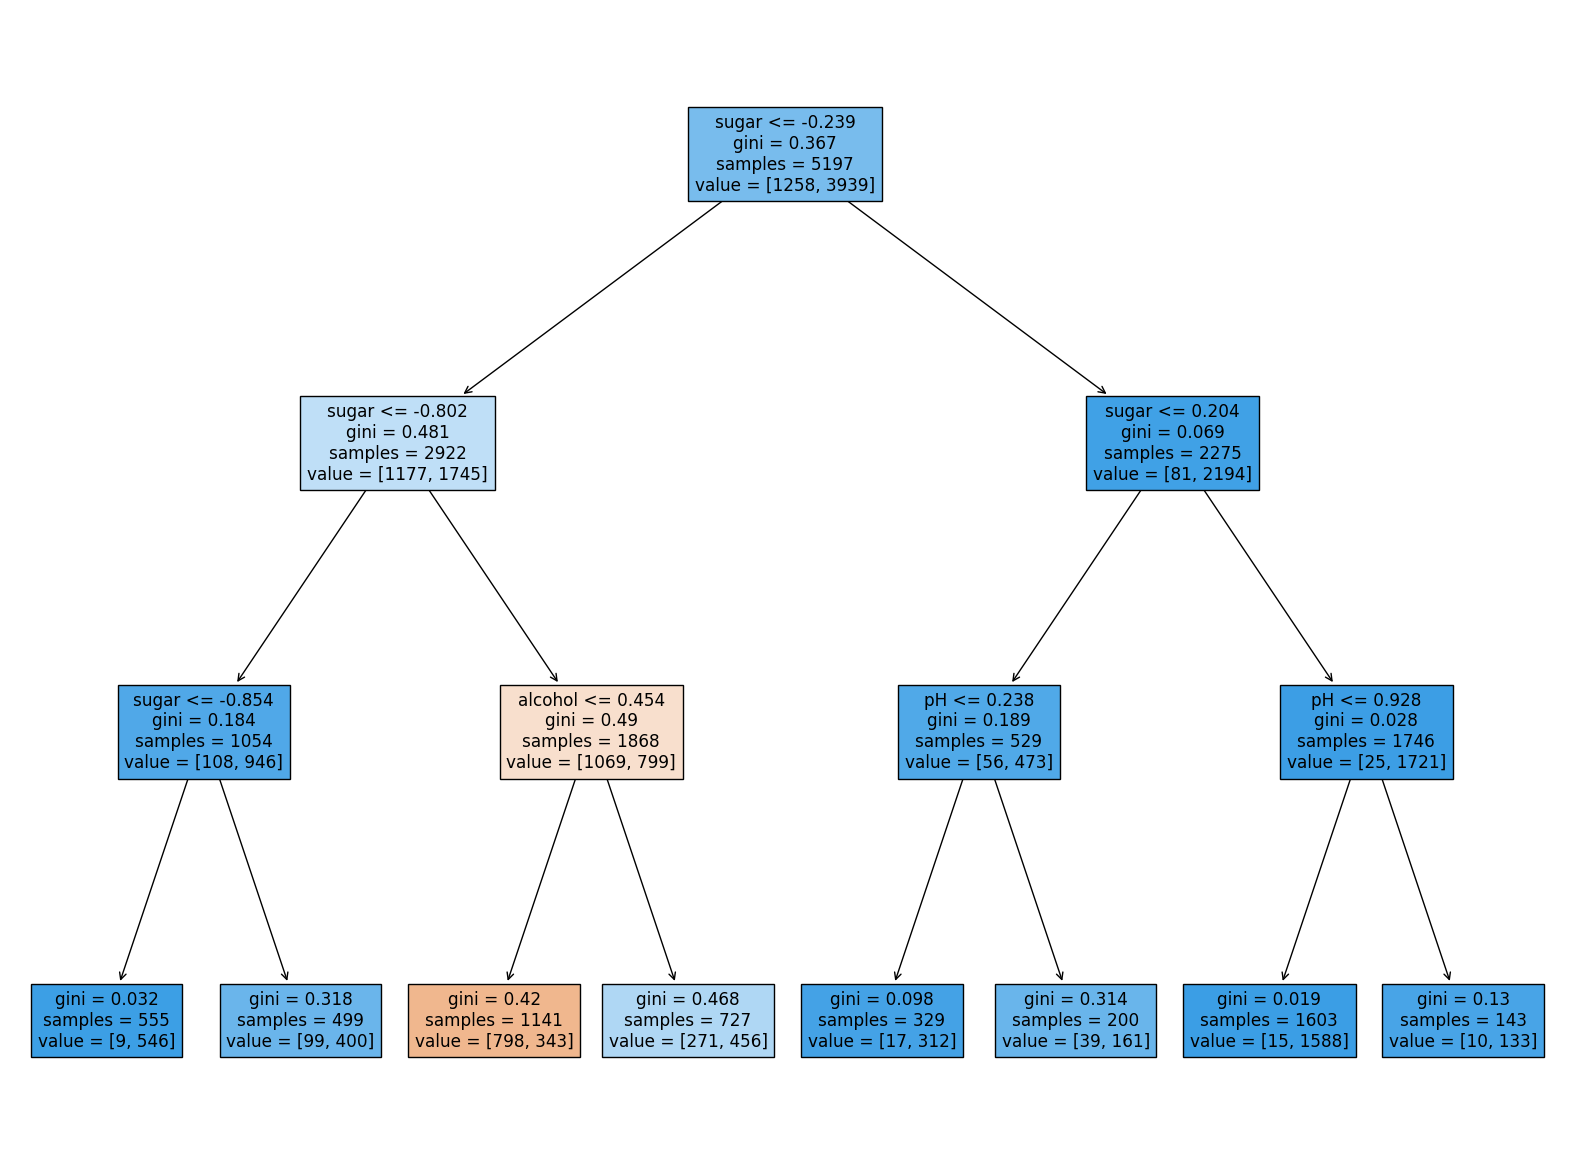

In [12]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

흐린 하늘색 : 음성클래스와 양성클래스의 개수가 비슷하기 때문에 흐리가 나왔다

In [13]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8572253223013276
0.8484615384615385


### 문제3번 (p.241)

In [14]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


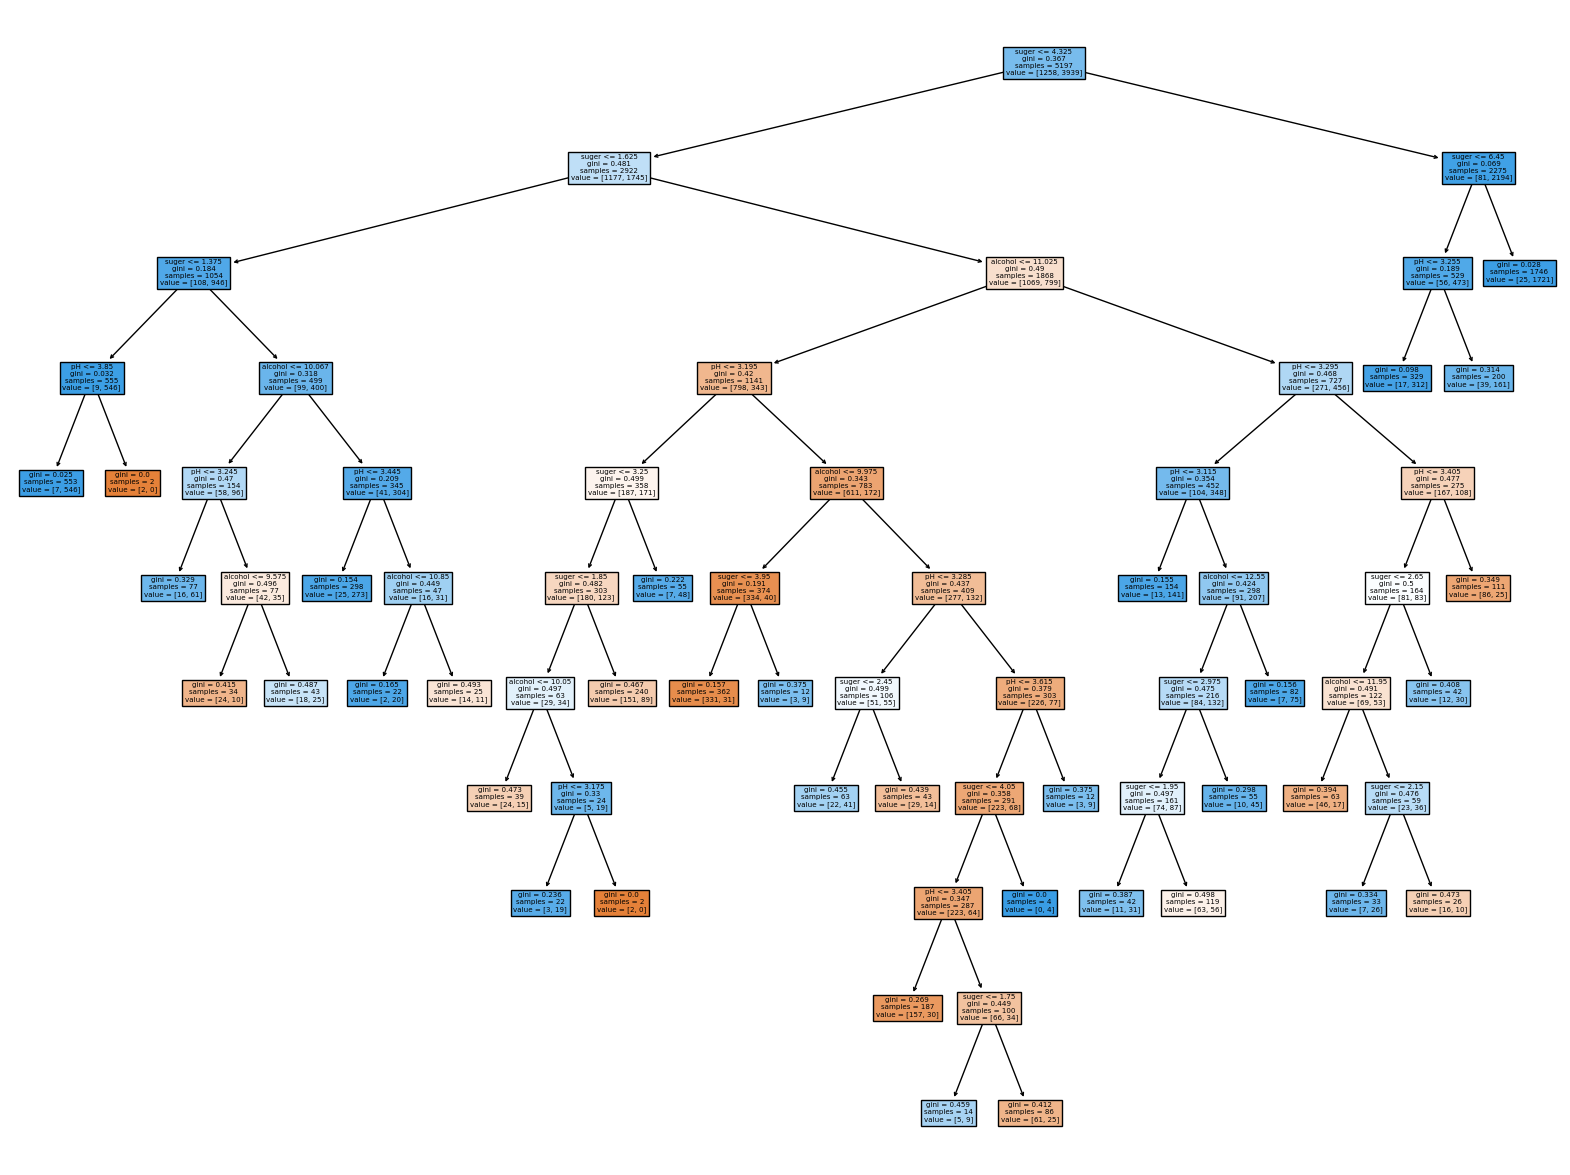

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'suger', 'pH'])
plt.show()

<문제 분석>

